In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
import statistics

%matplotlib inline

pd.set_option("max_columns", None)
pd.options.display.float_format = '{:,.10f}'.format

In [9]:
#Data understading
#First we load the available databases for Boston.
#Despite that there is more recent information available in inside Airbnb, our analysis uses the data extraction from 13 February 
#in order to avoid data after the COVID 19 pandemia beginning, that without doubt would have an abnormal behaviour (lower demand
#for example). 

path='C:/Users/rwester/Documents/Ricardo W/Apuntes,Cursos,Estudios/Data Science Nanodegree programm/Boston/'
listings=pd.read_csv(path+'listings.csv')
calendar=pd.read_csv(path+'calendar.csv')
reviews=pd.read_csv(path+'reviews.csv')

In [10]:
#Interesting are the offered price and availability by date for every listing
calendar.info()
calendar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424595 entries, 0 to 1424594
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   listing_id      1424595 non-null  int64  
 1   date            1424595 non-null  object 
 2   available       1424595 non-null  object 
 3   price           1424417 non-null  object 
 4   adjusted_price  1424417 non-null  object 
 5   minimum_nights  1424242 non-null  float64
 6   maximum_nights  1424242 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 76.1+ MB


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2020-02-13,f,$125.00,$125.00,28.0000000000,"1,125.0000000000"
1,3781,2020-02-14,f,$150.00,$150.00,28.0000000000,"1,125.0000000000"
2,3781,2020-02-15,f,$150.00,$150.00,28.0000000000,"1,125.0000000000"
3,3781,2020-02-16,f,$125.00,$125.00,28.0000000000,"1,125.0000000000"
4,3781,2020-02-17,f,$125.00,$125.00,28.0000000000,"1,125.0000000000"


In [11]:
#The Calendar shows the availability for the next 365 days with their respective price.
#The price by date could be usefull to determine the price variations and their amount during the year.
#There is information about 3903 listings
print(calendar.date.min(),calendar.date.max())
print(calendar.listing_id.nunique())

2020-02-13 2021-02-11
3903


In [12]:
#Mean availability (due to other guest reservation or block of the day by the host) are less than half for the next 365 days.
calendar['available'].value_counts()

f    735790
t    688805
Name: available, dtype: int64

In [13]:
#The listings database seems to be very rich in information. 
#Neighborhood, GPS location, score and amenities description are available for every listing
listings.info()
listings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3903 entries, 0 to 3902
Columns: 106 entries, id to reviews_per_month
dtypes: float64(20), int64(23), object(63)
memory usage: 3.2+ MB


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20200213183241,2020-02-13,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",nan,nan,https://a0.muscache.com/im/pictures/24670/b2de...,nan,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,100%,46%,t,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,nan,Boston,MA,02128,Boston,"Boston, MA",US,United States,42.3641300000,-71.0299100000,t,Apartment,Entire home/apt,2,1.0000000000,1.0000000000,0.0000000000,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",nan,$125.00,$750.00,"$2,250.00",$0.00,$75.00,2,$0.00,28,1125,28,28,1125,1125,28.0000000000,"1,125.0000000000",yesterday,t,3,3,13,39,2020-02-13,16,2,2015-07-10,2019-12-21,99.0000000000,10.0000000000,10.0000000000,10.0000000000,10.0000000000,10.0000000000,10.0000000000,t,NaN,"{""Massachusetts State"","" Massachusetts State""}",f,f,super_strict_30,f,f,1,1,0,0,0.2900000000
1,5506,https://www.airbnb.com/rooms/5506,20200213183241,2020-02-13,**$79 Special ** Private! Minutes to center!,"Private guest room with private bath, You do n...",**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,"Private guest room with private bath, You do n...",none,"Peacful, Architecturally interesting, historic...","Guest room is on the 3rd floor, Steps are req...","Excellent Access to all of Boston, Walk to Mus...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,nan,nan,https://a0.muscache.com/im/pictures/1598e8b6-5...,nan,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy g

In [14]:
#Reviews by guests for every listing
reviews.info()
print(reviews.head())
print(reviews['date'].min())
print(reviews['date'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161635 entries, 0 to 161634
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     161635 non-null  int64 
 1   id             161635 non-null  int64 
 2   date           161635 non-null  object
 3   reviewer_id    161635 non-null  int64 
 4   reviewer_name  161635 non-null  object
 5   comments       161521 non-null  object
dtypes: int64(3), object(3)
memory usage: 7.4+ MB
   listing_id        id        date  reviewer_id reviewer_name  \
0        3781  37776825  2015-07-10     36059247          Greg   
1        3781  41842494  2015-08-09     10459388           Tai   
2        3781  45282151  2015-09-01     12264652        Damien   
3        3781  49022647  2015-09-30     41426327          Mike   
4        3781  52503327  2015-10-30     15151513          Ivan   

                                            comments  
0  The apartment was as advertised a

In [15]:
#Business Understanding
#Base on the available data seeing above, we ask ourself the following questions: 

# a)Which are the most demanded seasons in boston?
# b)How much rises the prices in high season?
# c)Which are the most expensivest neighbourhoods?
# d)Which are the most demanded neighbourhoods?

#For answering these questions we will use data from the calendar, reviews and listings databases.

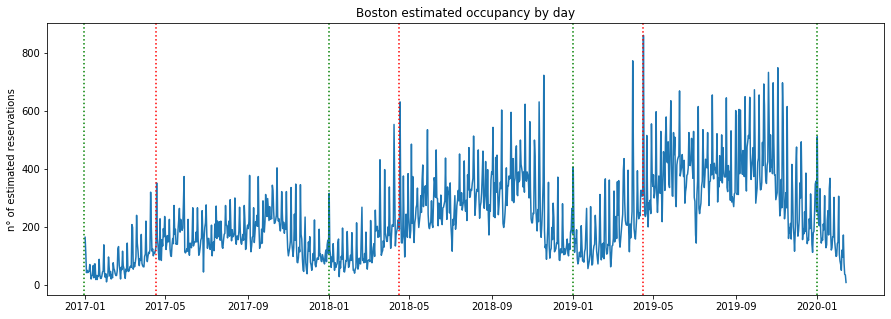

In [64]:
#To answer the first question, we need to estimate the occupancy by date.
#The Calendar information may not be useful cause the reason behind an unavailable date is not public available, 
#(it's imposible to distinguish wheter it's already booked by other guest or the date is block by the host).

# Instead, the assumption of the occupancy model from the "Inside Airbnb San Francisco Model" will be used. 
# The assumption states that 50% of the total listing's bookings write a review 
#(source: http://insideairbnb.com/about.html#disclaimers).

#We plot the bookings by date and highlight the dates of the boston marathon from the last 3 years, event that gathers more than
#30.000 competitors by year and that with certainty causes a peak of demand that day. (source: https://www.baa.org/races/boston-marathon/results/participation)

review_new = reviews.copy()

review_new = review_new.groupby('date')['id'].unique().reset_index()
review_new['id']=review_new['id'].map(lambda x: 2*len(x))
review_new['date'] = pd.to_datetime(review_new['date'])

d1=dt.datetime(2017,1,1)
bm17=dt.datetime(2017,4,17)
bm18=dt.datetime(2018,4,16)
bm19=dt.datetime(2019,4,15)

nye17=dt.datetime(2016,12,31)
nye18=dt.datetime(2017,12,31)
nye19=dt.datetime(2018,12,31)
nye20=dt.datetime(2019,12,31)


review_new=review_new[review_new['date']>=d1]

plt.figure(figsize=(15, 5))
plt.plot(review_new['date'], review_new['id'])
plt.axvline(x=bm17,c='red',ls=':')
plt.axvline(x=bm18,c='red',ls=':')
plt.axvline(x=bm19,c='red',ls=':')
plt.axvline(x=nye17,c='green',ls=':')
plt.axvline(x=nye18,c='green',ls=':')
plt.axvline(x=nye19,c='green',ls=':')
plt.axvline(x=nye20,c='green',ls=':')

plt.title('Boston estimated occupancy by day')
plt.ylabel('n° of estimated reservations')
plt.savefig('boston_estimated_occupancy.png')
plt.show();

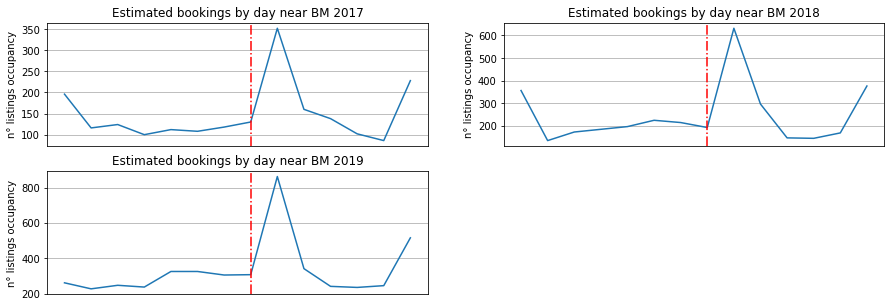

In [17]:
# It can be seen that there is a local maximum of demand near the date of the marathon.
# However, it must be considered that the date of the review is not necesary the date of the stay in the listing place.

#If we see in detail the estimated reservation by day one week before and after the boston marathon, it can be estimate an average 
#delay between the start day of occupancy and the review. 
#In the following plots the boston marathon date is resalted in red. With a high certainty it can be assume that the observed 
#peak of bookigns actually occurred the day before the competition (competitors need to arrive at least one day before the 
#marathon ir order to be properly restful before the competition), so we can conclude that users write a review on average two 
#days after their stay. This aproximation will be use forward for determine the most demanded day in the week.

dw=dt.timedelta(days=7)

bm1_=review_new[(review_new['date']>=(bm17-dw)) & (review_new['date']<(bm17+dw))]
bm2_=review_new[(review_new['date']>=(bm18-dw)) & (review_new['date']<(bm18+dw))]
bm3_=review_new[(review_new['date']>=(bm19-dw)) & (review_new['date']<(bm19+dw))]


plt.figure(figsize=(15,5))
x_pos = np.arange(0,14)

plt.subplot(221)
plt.plot(bm1_['date'], bm1_['id'])
plt.axvline(x=bm17,c='red',ls='-.')
plt.title('Estimated bookings by day near BM 2017')
plt.ylabel('n° listings occupancy')
plt.xticks([])
plt.grid(True)

plt.subplot(222)
plt.plot(bm2_['date'], bm2_['id'])
plt.axvline(x=bm18,c='red',ls='-.')
plt.title('Estimated bookings by day near BM 2018')
plt.ylabel('n° listings occupancy')
plt.xticks([])
plt.grid(True)

plt.subplot(223)
plt.plot(bm3_['date'], bm3_['id'])
plt.axvline(x=bm19,c='red',ls='-.')
plt.title('Estimated bookings by day near BM 2019')
plt.ylabel('n° listings occupancy')
plt.xticks([])
plt.grid(True)

plt.show();

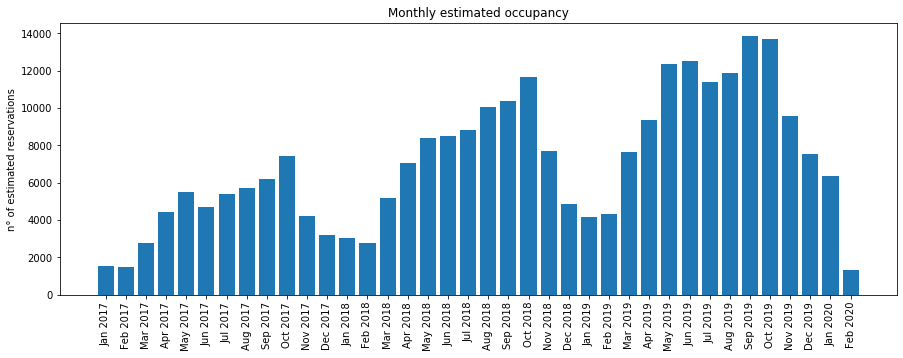

Average monthly reservations during high season are: 9353 .
Average monthly reservations during low season are: 4924 and demand decreases -0.47353790227734416 vs high season.
Average monthly reservations during January and February are: 3374 and demand decreases -0.6392601304394312 vs high season.


In [67]:
#Now that we estimated the average delay we analize the occupancy by month. 
#It is quite obvious that the demand is higher during the warmer months during Spring and Summer, but the question is:
#how much rise demand during that period?
#By plotting the estimated demand by month from the previous 3 years, it can be seen that months between May and October
#are the most demanded.
#After October the demands falls through Autumm achieving its lower value during the 
#hardest part of winter (January and February)

review_new.index = review_new['date']
review_monthly=review_new.resample('M').sum()

plt.figure(figsize=(15, 5))
x_ticks=pd.DataFrame(data=review_monthly.index)
x_ticks['date']=x_ticks['date'].dt.strftime("%b %Y")
x_pos = np.arange(len(x_ticks))

plt.bar(x_pos, review_monthly['id'],align='center')
plt.xticks(x_pos, x_ticks['date'],rotation=90)
plt.title('Monthly estimated occupancy')
plt.ylabel('n° of estimated reservations')
plt.savefig('boston_monthly_occupancy.png')
plt.show();

review_monthly['month_name']=review_monthly.index.strftime("%b")
high_season=['May','Jun','Jul','Aug','Sep','Oct']
low_season=['Nov','Dec','Jan','Feb','Mar','Apr']
lowest_season=['Jan','Feb']

higher_demand=[review_monthly.iloc[i][0] for i in range(review_monthly.shape[0]) if review_monthly.iloc[i][1] in high_season]
lower_demand=[review_monthly.iloc[i][0] for i in range(review_monthly.shape[0]) if review_monthly.iloc[i][1] in low_season]
lowest_demand=[review_monthly.iloc[i][0] for i in range(review_monthly.shape[0]) if review_monthly.iloc[i][1] in lowest_season]
#we exclude partially data from february 2020
lowest_demand=lowest_demand[0:-1]

avg_high=statistics.mean(higher_demand)
avg_low=statistics.mean(lower_demand)
avg_lowest=statistics.mean(lowest_demand)

print('Average monthly reservations during high season are:', avg_high, '.')
print('Average monthly reservations during low season are:', avg_low, 'and demand decreases',(avg_low-avg_high)/avg_high, 'vs high season.')
print('Average monthly reservations during January and February are:', avg_lowest, 'and demand decreases',(avg_lowest-avg_high)/avg_high, 'vs high season.')


In [43]:
def cast_monetary_float(columns,df):
    '''
    Function that cast columns with monetary data from a string type to float
    Input: columns: column list with columns names to be cast
           df: dataframe with target columns
    Output: dataframe with transform columns
    '''
    for col in columns:
        try:
            df[col]=df[col].str.replace(',', '')
            df[col]=df[col].str.replace('$', '')
            df[col]=df[col].astype(float)
        except:
            print('Formato incorrecto')

        return df

#Data preprocessing from calendar database: monetary columns are transform to float.     
calendar=cast_monetary_float(['price','adjusted_price'],calendar)
calendar_new=calendar.copy()

calendar_new['date'] = pd.to_datetime(calendar_new['date'])
calendar_new=calendar_new[['date','price']]

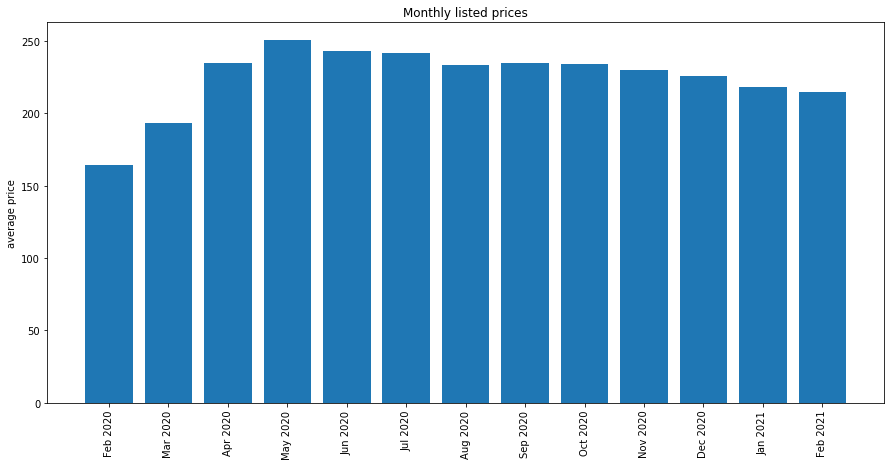

Average listing price during high season are: 239.66876182114254 .
Average listing price during low season are: 211.6541988288448 and high season prices are 0.13236006253271562 higher
Average listing price during January and February are: 199.23020071094768 and high season prices are 0.20297405195543106 higher
85.8111917996228


,price,month_name
date,,
2020-02-29,164.6377597926,Feb
2020-03-31,193.3919482945,Mar
2020-04-30,234.7378597660,Apr
2020-05-31,250.4489515922,May
2020-06-30,243.3130839525,Jun
2020-07-31,241.4134288761,Jul
2020-08-31,233.7157901698,Aug
2020-09-30,235.1229284128,Sep
2020-10-31,233.9983879235,Oct


In [95]:
#Price information correspond to the one available in the published calendar of every listing, therefore these prices may be 
#subject to future changes, but still work for identifying price tendencies.

#Monthly average prices show us that the most demanded months are also the expensivest ones.
#The average price of the most require months(May-Oct) is 21% higher than 
#the average of the lowest demanded (Nov-Apr) and if we compare the lowest and highest months average (Feb-20 and May-20) the 
#difference is from $85,8 (52%) , that's a tremendous increase in just 3 months!

calendar_new.index = calendar_new['date']
monthly_prices=calendar_new.resample('M').mean()

plt.figure(figsize=(15, 7))
x_ticks=pd.DataFrame(data=monthly_prices.index)
x_ticks['date']=x_ticks['date'].dt.strftime("%b %Y")
x_pos = np.arange(len(x_ticks))

plt.bar(x_pos, monthly_prices['price'],align='center')
plt.xticks(x_pos, x_ticks['date'],rotation=90)
plt.title('Monthly listed prices')
plt.ylabel('average price')
plt.show()


monthly_prices['month_name']=monthly_prices.index.strftime("%b")
higher_demand=[monthly_prices.iloc[i][0] for i in range(monthly_prices.shape[0]) if monthly_prices.iloc[i][1] in high_season]
lower_demand=[monthly_prices.iloc[i][0] for i in range(monthly_prices.shape[0]) if monthly_prices.iloc[i][1] in low_season]
lowest_demand=[monthly_prices.iloc[i][0] for i in range(monthly_prices.shape[0]) if monthly_prices.iloc[i][1] in lowest_season]

avg_high=statistics.mean(higher_demand)
avg_low=statistics.mean(lower_demand)
avg_lowest=statistics.mean(lowest_demand)

print('Average listing price during high season are:', avg_high, '.')
print('Average listing price during low season are:', avg_low, 'and high season prices are',(avg_high-avg_low)/avg_low, 'higher')
print('Average listing price during January and February are:', avg_lowest, 'and high season prices are',(avg_high-avg_lowest)/avg_lowest, 'higher')


greatest_dif=monthly_prices.loc[dt.datetime(2020,5,31)]['price']-monthly_prices.loc[dt.datetime(2020,2,29)]['price']
print(greatest_dif)
monthly_prices


day_name
Monday      223.6494029990
Tuesday     223.5383159793
Wednesday   224.8632343013
Thursday    225.6923024856
Friday      234.1640861381
Saturday    235.0846991573
Sunday      224.0116049298
Name: price, dtype: float64

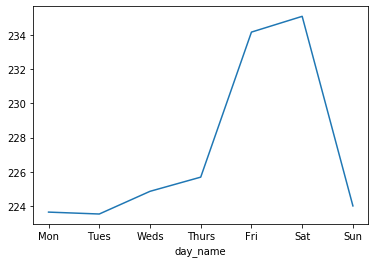

In [45]:
#There are also differences between days of week. Sunday to Tuesday are the cheapest days, from wednesday prices start to 
#rise and continue ascending till Saturday, the expensivest day. Saturday could be on average 5% expensiver than Monday or 
#Tuesday. The price increase logically has a direct relationship with demand rise during weekends. The later can be confirmed
#with the estimated demand by days of week.

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#average price by day of week
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['dayofweek'] = calendar.date.dt.weekday

calendar['day_name']=[cats[i] for i in calendar['dayofweek']]
price_week=calendar[['day_name','price']]
price_week = price_week.groupby(price_week['day_name'])['price'].mean().reindex(cats)

fig1, ax1 = plt.subplots()
price_week.plot()
ticks = list(range(0, 7, 1))
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels);
price_week

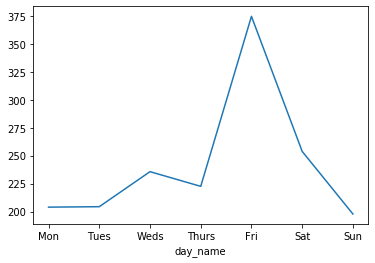

In [46]:
#Estimated demand by days of week.
#Next we apreciate the average number of bookings by day corrected by the estimated delay of two days. It can be seen that 
#weekend's Days are the most demanded headed by Friday, which makes sence cause people that travel for leisure try to take the 
#most of weekend.

l3y=dt.datetime(2017,2,13)

review_day = reviews.copy()
review_day['date'] = pd.to_datetime(review_day['date'])
review_day=review_day[review_day['date']>=l3y]

cats = ['Saturday','Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
cats_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

review_day = review_day.groupby('date')['id'].unique().reset_index()
review_day['n_reservation']=review_day['id'].map(lambda x: 2*len(x))

review_day['dayofweek']=review_day.date.dt.weekday
review_day['day_name']=[cats[i] for i in review_day['dayofweek']]

occup_week=review_day[['day_name','n_reservation']]

occup_week = occup_week.groupby(occup_week['day_name'])['n_reservation'].mean().reindex(cats_order)
occup_week.plot()
ticks = list(range(0, 7, 1))
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels);


In [47]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...


count    3,903.0000000000
mean       198.0999231360
std        572.3304318991
min          0.0000000000
25%         80.0000000000
50%        135.0000000000
75%        200.0000000000
max     10,000.0000000000
Name: price, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1ac708476d8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac7084edd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac708479b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac708bde48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac708a6978>],
 'means': []}

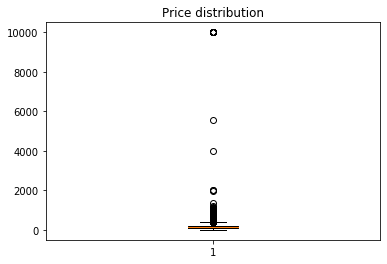

In [48]:
#Now, proceed to estimate the expensivest neighbourhoods of boston
#First, we check the listing´s price distribution:
listings=cast_monetary_float(['price'],listings)
print(listings['price'].describe())


#clearly there exists outlyers in the base
fig1, ax1 = plt.subplots()
ax1.set_title('Price distribution')
ax1.boxplot(listings['price'])

In [49]:
#If we inspect the most expensive listings we realize that there are not available (perhaps it was a joke or fake by someone) or
#the listed price is much lower than the one that appears below.
listings.sort_values(by='price', axis=0, ascending=False).head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3476,39622689,https://www.airbnb.com/rooms/39622689,20200213183241,2020-02-13,"Copley House, Single Shared Bathroom",Live how the New Englanders live when you stay...,Attractive apartments will be your home away f...,Live how the New Englanders live when you stay...,none,NaN,NaN,NaN,NaN,NaN,Your room charge will be paid prior to your ar...,nan,nan,https://a0.muscache.com/im/pictures/a86d13ee-5...,nan,303684515,https://www.airbnb.com/users/show/303684515,Copley House,2019-10-21,US,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/637a9...,https://a0.muscache.com/im/pictures/user/637a9...,Back Bay,0,0,"['email', 'phone']",t,f,"Boston, MA, United States",Back Bay,Back Bay,nan,Boston,MA,02116,Boston,"Boston, MA",US,United States,42.3454800000,-71.0791200000,t,Boutique hotel,Private room,2,1.0000000000,1.0000000000,1.0000000000,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",nan,"10,000.0000000000",NaN,NaN,NaN,NaN,1,$0.00,1,1125,1,1,1125,1125,1.0000000000,"1,125.0000000000",4 months ago,t,30,60,90,365,2020-02-13,0,0,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,t,STR-420772,"{""Massachusetts State"","" Massachusetts State""}",f,f,flexible,f,f,9,0,9,0,nan
3505,39772945,https://www.airbnb.com/rooms/39772945,20200213183241,2020-02-13,"Boston Homestel, 1 Double and 1 Single Bed",Please read everything before making a reserva...,Our hostel also included private rooms. You’ll...,Please read everything before making a reserva...,none,NaN,"Breakfast is not included, but we have a full ...",The metro train station is 3 minutes walk away...,You'll have access to the kitchen and common a...,We have a staff person most days between 10AM ...,Your room charge will be paid prior to your ar...,nan,nan,https://a0.muscache.com/im/pictures/837916ff-8...,nan,305274008,https://www.airbnb.com/users/show/305274008,Boston,2019-10-29,"Boston, Massachusetts, United States",NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/24c51...,https://a0.muscache.com/im/pictures/user/24c51...,Dorchester,2,2,"['email', 'phone']",t,t,"Boston, MA, United States",Dorchester,Dorchester,nan,Boston,MA,02125,Boston,"Boston, MA",US,United States,42.3210200000,-71.0557500000,t,Boutique hotel,Private room,3,1.0000000000,1.0000000000,2.000000

46


{'whiskers': [<matplotlib.lines.Line2D at 0x1ac0390aef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac031395c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac0390aba8>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac03139c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac03139f98>],
 'means': []}

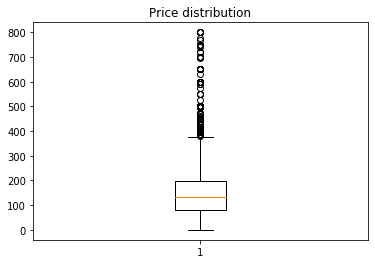

In [50]:
#From the main indicators seen above, we have to define a border above which the listings prices will be considered outlyers
#800 dolars seems to be a plausible limit, because with this criteria only 46 of the 3903 listings will be discarded.

#Now it looks much better
data=listings.loc[listings.price>800]['price']
print(data.count())

fig1, ax1 = plt.subplots()
ax1.set_title('Price distribution')
ax1.boxplot(listings.loc[listings.price<=800]['price'])

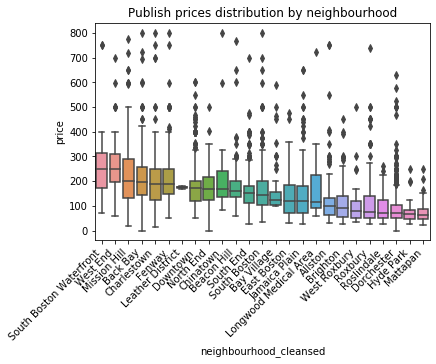

In [98]:
#Finally we obtain average prices by neighbourhood
#The South Boston Waterfront and the West end are the expensivest neighbourhoods to book in Airbnb. The first is a district that
#has suffered a series of renovations since the beginning of the 21st Century that had turn it into a flourish neigbourhood.
#The second is a mixed-use commercial and residential area district near downtown.
#After them in prices comes Mission Hill, that is known by his architectural value and then a series of neighbourhoods that are 
#located nearby downtown, like Charlestown, back bay, Beacon hill, North End and Chinatown.
#The cheapest districts are suburbs located far from downtown, like Mattapan, hyde park and dorchester.
sort_order = listings.query('price <= 800')\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=listings.query('price <= 800'), 
            order=sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Publish prices distribution by neighbourhood')
plt.show()

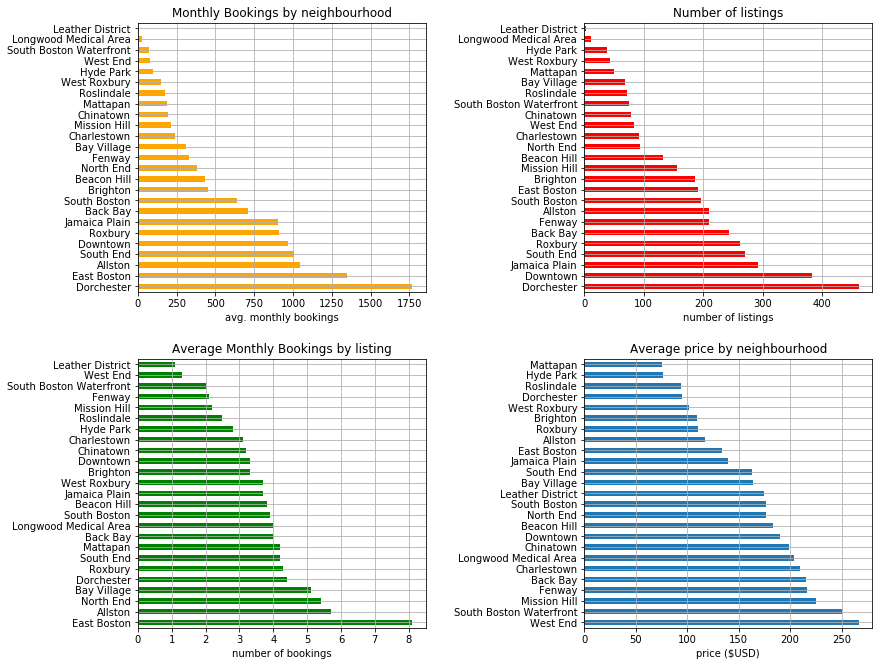

,price
neighbourhood_cleansed,
West End,266.4691358025
South Boston Waterfront,250.6133333333
Mission Hill,224.9738562092
Fenway,216.2596153846
Back Bay,215.0786026201
Charlestown,209.5217391304
Longwood Medical Area,203.6363636364
Chinatown,198.4871794872
Downtown,190.2125984252


In [52]:
#In order to answer question four we proceed to elaborate a series of indicators 

#The number of reservation per ce don't tell us so much cause bigger neighbourhoods tend to have more listings offer, like 
#Dorchester, East Boston and Roxbury.
#Therefore we need to look at an indicator at a listing level, like the mean occupancy by listing

#Monthly average number of reservations by neighbourhood
neigh_reser=listings.groupby(by='neighbourhood_cleansed').sum()[['reviews_per_month']].sort_values(by='reviews_per_month', ascending=False)
neigh_reser['reviews_per_month']=neigh_reser['reviews_per_month']*2

neigh_reser=neigh_reser.round({'reviews_per_month':1})


plt.subplot(221)
neigh_reser['reviews_per_month'].plot(kind = 'barh' , figsize = (12,10),color='orange')
plt.ylabel('')
plt.xlabel('avg. monthly bookings');
plt.title('Monthly Bookings by neighbourhood');
plt.grid(True)

#Monthly average number of reservations by listing per neighbourhood
neigh_reser_l=listings.groupby(by='neighbourhood_cleansed').mean()[['reviews_per_month']].sort_values(by='reviews_per_month', ascending=False)
neigh_reser_l['reviews_per_month']=neigh_reser_l['reviews_per_month']*2

neigh_reser_l=neigh_reser_l.round({'reviews_per_month':1})

plt.subplot(223)
neigh_reser_l['reviews_per_month'].plot(kind = 'barh' , figsize = (12,10),color='green')
plt.ylabel('')
plt.xlabel('number of bookings');
plt.title('Average Monthly Bookings by listing');
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.55)

#Number of listings per neighbouhood
neigh_id=listings.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False)


plt.subplot(222)
neigh_id['id'].plot(kind = 'barh' , figsize = (12,10),color='red')
plt.ylabel('')
plt.xlabel('number of listings');
plt.title('Number of listings');
plt.grid(True)


#Average price by neighbourhood
neigh_price=listings[listings.price<=800].groupby(by='neighbourhood_cleansed').mean()[['price']].sort_values(by='price', ascending=False)

plt.subplot(224)
neigh_price['price'].plot(kind = 'barh' , figsize = (12,10))
plt.ylabel('')
plt.xlabel('price ($USD)');
plt.title('Average price by neighbourhood');
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.55)

plt.show()
neigh_price
#Surprisingly, the most demanded places are not the best for sightseeing as one had expected.
#On the one hand Dorchester and Allston, first and third most requested districts, are both very inexpensive. 
#(Dorchester average price is almost half of downtown). Despite Dorchester is very far from 
#Downtown, Red subway line operates throug it, offering a good transport option. 
#Allston has the advantage that is not far from downtown offering a convenient option for tourist travelling by car.

#On the other hand, East Boston and South End (second and fourth respectively) are middle price neightbouhoods not so far from
#downtown and with a very broad offer of public transport.